# imports

In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os     
import seaborn as sns 
import cv2  

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.applications import ResNet50,MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten , Input  , Conv2D , MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import save_img



import PIL
from PIL import Image 
import matplotlib.image as mimg 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import gc
import warnings
warnings.filterwarnings("ignore")



# DATA Augmenation

In [5]:
# output_dir ='/kaggle/working/augmented_images'
# os.makedirs(output_dir, exist_ok=True)

# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
# data_dir = '/kaggle/input/face-mask-dataset/data'  
# output_count = 2  
# label_names=["with_mask","without_mask"]

# for class_name in label_names:  
#     output_dir =f'/kaggle/working/augmented_images/{class_name}'
#     os.makedirs(output_dir, exist_ok=True)
    
#     class_dir = os.path.join(data_dir, class_name)
#     images = os.listdir(class_dir)
    
#     for img_name in images:
#         img_path = os.path.join(class_dir, img_name)
#         img = load_img(img_path) 
#         x = img_to_array(img)  
#         x = np.expand_dims(x, axis=0)  
        

#         i = 0
#         for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix=class_name, save_format='jpeg'):
#             i +=1
#             if i >= output_count:  
#                 break
                
                

# Load data...

In [6]:
folder_path='/kaggle/working/augmented_images'
label_names=os.listdir(folder_path)
print(label_names) 

['with_mask', 'without_mask']


In [7]:
wz_mask=os.path.join(folder_path,'with_mask')
wz_out_mask=os.path.join(folder_path,'without_mask')

In [8]:
with_mask_file=os.listdir(wz_mask)
without_mask_file=os.listdir(wz_out_mask)

In [9]:
print(len(with_mask_file))
print(len(without_mask_file))


5196
5335


In [10]:
WithMaskLabels=[1]*len(with_mask_file)
WithoutMaskLabel=[0]*len(without_mask_file) 

In [11]:
print(len(WithMaskLabels))
print(len(WithoutMaskLabel))

5196
5335


In [12]:
WithMaskLabels[:10],WithoutMaskLabel[-10:]

([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
labels=WithMaskLabels+WithoutMaskLabel
print("labels no:",len(labels))
labels[:10],labels[-10:]

labels no: 10531


([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
wz_mask_sample=with_mask_file[150]
wz_out_mask_sample=without_mask_file[200] 

# Plot samples

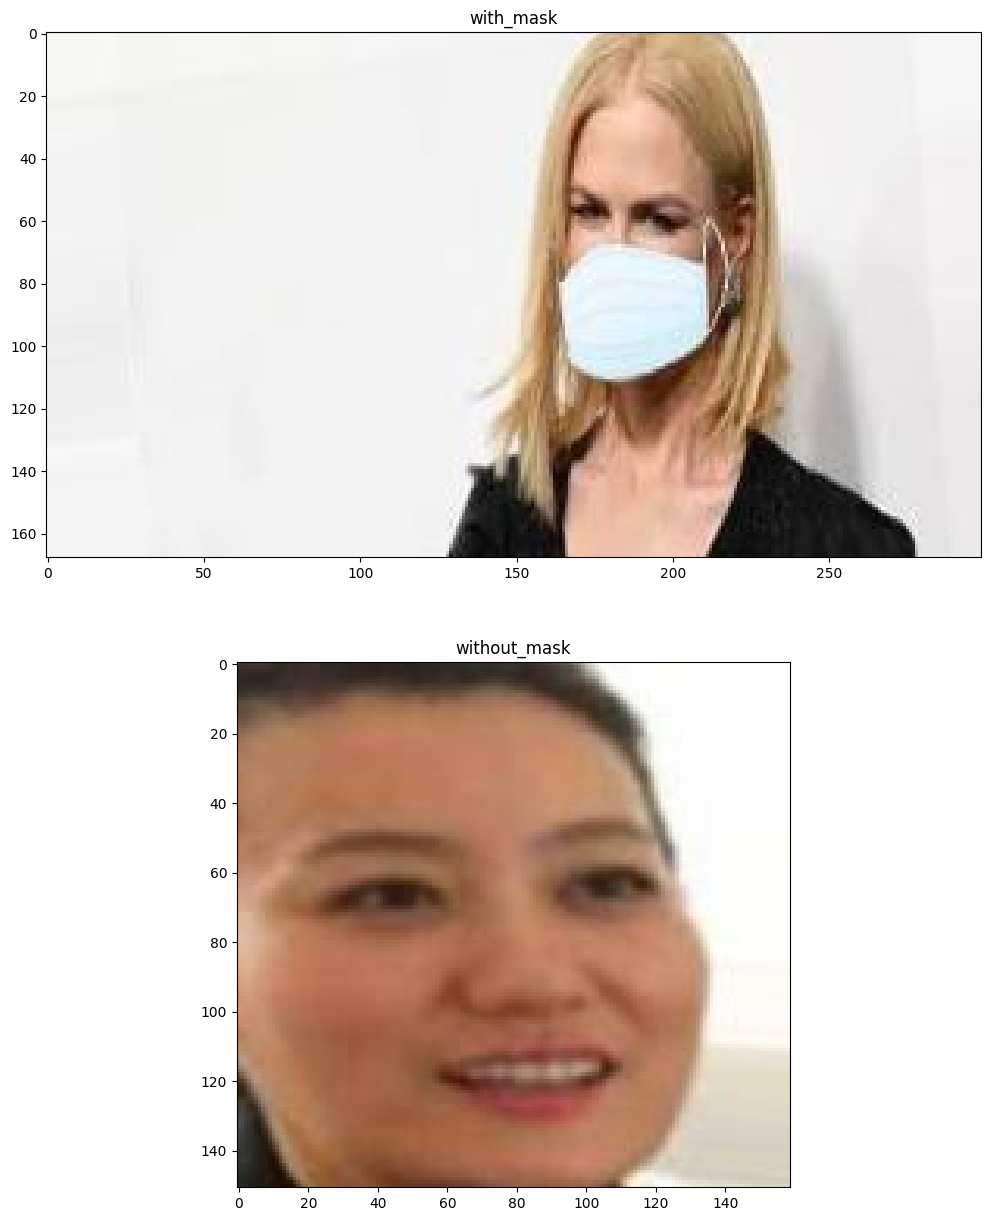

In [15]:
wz_mask_image=os.path.join(wz_mask,wz_mask_sample)
wz_out_mask_image=os.path.join(wz_out_mask,wz_out_mask_sample)


n=[wz_mask_image,wz_out_mask_image]
plt.figure(figsize=(15,15))
for i in range(2):

    plt.subplot(2,1,i+1)
    plt.title(label_names[i])
    img=plt.imread(n[i])
    plt.imshow(img)



In [16]:
type(img)

numpy.ndarray

In [17]:
img.shape

(151, 159, 3)

# Labeling the data

In [18]:
type(labels)

list

In [19]:
with_mask_path = '/kaggle/working/augmented_images/with_mask'

images = []

for img_file in with_mask_file:

    file_path = os.path.join(with_mask_path, img_file)

    img = Image.open(file_path)

    img = img.resize((128,128))

    img = img.convert('RGB')

    img = np.array(img)

    images.append(img)

    gc.collect() 

In [20]:
without_mask_path = '/kaggle/working/augmented_images/without_mask'

for img_file in without_mask_file:

    file_path = os.path.join(without_mask_path, img_file)
    
    img = Image.open(file_path)

    img = img.resize((128,128))

    img = img.convert('RGB')

    img = np.array(img)

    images.append(img)

    gc.collect() 

In [21]:
type(images)

list

In [22]:
images[0].shape

(128, 128, 3)

In [23]:
len(images)

10531

In [24]:
x=np.array(images)
y=np.array(labels)

In [25]:
type(x),type(y)

(numpy.ndarray, numpy.ndarray)

In [26]:
print(x.shape,y.shape)

(10531, 128, 128, 3) (10531,)


# splite data

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) 

In [28]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(8424, 128, 128, 3) (8424,)
(2107, 128, 128, 3) (2107,)


In [29]:
x_train[0] , y_train


(array([[[173, 139, 137],
         [173, 139, 137],
         [174, 140, 138],
         ...,
         [ 30,  24,  28],
         [ 30,  24,  28],
         [ 30,  24,  28]],
 
        [[174, 140, 138],
         [174, 140, 138],
         [175, 141, 139],
         ...,
         [ 31,  25,  29],
         [ 31,  25,  29],
         [ 31,  25,  29]],
 
        [[175, 141, 139],
         [175, 141, 139],
         [176, 142, 140],
         ...,
         [ 32,  24,  27],
         [ 33,  25,  28],
         [ 33,  25,  28]],
 
        ...,
 
        [[ 34,  33,  38],
         [ 34,  34,  39],
         [ 35,  35,  40],
         ...,
         [ 13,  15,  30],
         [ 12,  14,  29],
         [ 12,  14,  29]],
 
        [[ 37,  34,  39],
         [ 37,  35,  40],
         [ 38,  36,  41],
         ...,
         [ 12,  14,  29],
         [ 11,  13,  28],
         [ 11,  13,  28]],
 
        [[ 38,  36,  41],
         [ 38,  36,  41],
         [ 39,  37,  42],
         ...,
         [ 11,  13,  28],
  

In [30]:
x_train.shape ,y_train.shape,

((8424, 128, 128, 3), (8424,))

# Build generator

In [31]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow(x_train, y_train, batch_size=32)

test_generator = datagen.flow(x_test, y_test, batch_size=32)

# Build model stracture

In [53]:
Nn_model=Sequential()
input_shape=(128,128,3)

Nn_model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
Nn_model.add(MaxPooling2D((2,2)))

Nn_model.add(Conv2D(64,(3,3),activation='relu'))
Nn_model.add(MaxPooling2D((2,2)))

Nn_model.add(Conv2D(64,(3,3),activation='relu'))
Nn_model.add(MaxPooling2D((2,2)))

Nn_model.add(GlobalAveragePooling2D())  
Nn_model.add(Dropout(0.5))

Nn_model.add(Dense(512,activation='relu'))

Nn_model.add(Dense(256,activation='relu'))
Nn_model.add(Dropout(0.5))

Nn_model.add(Dense(256,activation='relu'))

Nn_model.add(Dense(128,activation='relu'))
Nn_model.add(Dropout(0.5))

Nn_model.add(Dense(128,activation='relu'))

Nn_model.add(Dense(64,activation='relu'))
Nn_model.add(Dropout(0.5))

Nn_model.add(Dense(32,activation='relu'))

Nn_model.add(Dense(16,activation='relu'))
Nn_model.add(Dropout(0.5))


Nn_model.add(Dense(1,activation='sigmoid',kernel_regularizer=l2(0.001)))


# Compile the model

In [54]:
Nn_model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=[
                  "accuracy"
                    ])
Nn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,009 (1.32 MB)

 Trainable params: 347,009 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

# Train model

In [55]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
History = Nn_model.fit(train_generator, epochs=20, batch_size=16, validation_data=test_generator, callbacks=[early_stopping])

Epoch 1/20
 69/264 ━━━━━━━━━━━━━━━━━━━━ 24s 124ms/step - accuracy: 0.5109 - loss: 0.6950

I0000 00:00:1726355839.835396     971 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_3', 256 bytes spill stores, 256 bytes spill loads



264/264 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.5365 - loss: 0.6904 - val_accuracy: 0.6554 - val_loss: 0.6763
Epoch 2/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6828 - loss: 0.6637 - val_accuracy: 0.6777 - val_loss: 0.6343
Epoch 3/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7055 - loss: 0.6127 - val_accuracy: 0.6440 - val_loss: 0.6010
Epoch 4/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6944 - loss: 0.5912 - val_accuracy: 0.7817 - val_loss: 0.5517
Epoch 5/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7529 - loss: 0.5445 - val_accuracy: 0.7518 - val_loss: 0.5617
Epoch 6/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7729 - loss: 0.5144 - val_accuracy: 0.8372 - val_loss: 0.3884
Epoch 7/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8397 - loss: 0.4238 - val_accuracy: 0.8880 - val_loss: 0.3290
Epoch 8/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8520 - loss: 0.3931 - val_accuracy: 0.90

# save and valid the model

In [70]:
Nn_model.save('face_mask_finally.h5')

In [71]:
Nn_model.save('face_mask_finally.keras')

enter number of image you want to Verify it:  5
Enter image path !!:  /kaggle/input/face-mask-dataset/data/without_mask/without_mask_1024.jpg


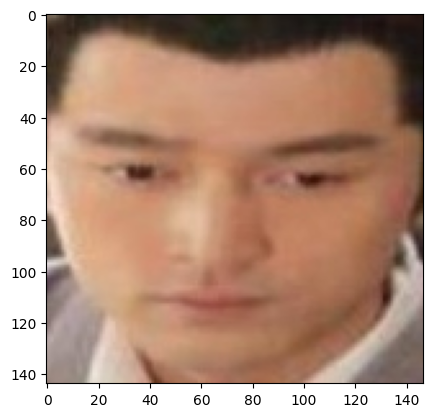

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
[[0.8928053  0.15366197]]
This person is not wearing a mask.


Enter image path !!:  /kaggle/input/face-mask-dataset/data/without_mask/without_mask_1009.jpg


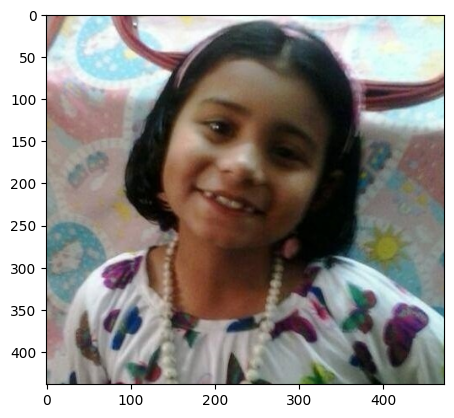

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.418475 0.60944 ]]
This person is wearing a mask.


Enter image path !!:  /kaggle/input/face-mask-dataset/data/without_mask/without_mask_1004.jpg


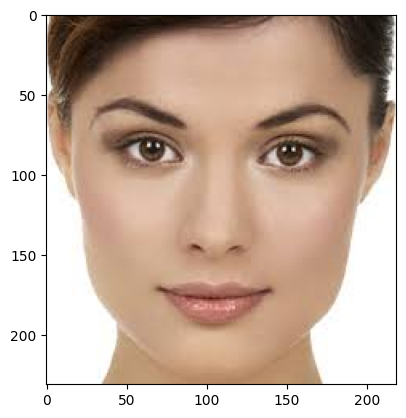

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.9448923  0.08792225]]
This person is not wearing a mask.


Enter image path !!:  /kaggle/input/face-mask-dataset/data/without_mask/without_mask_10.jpg


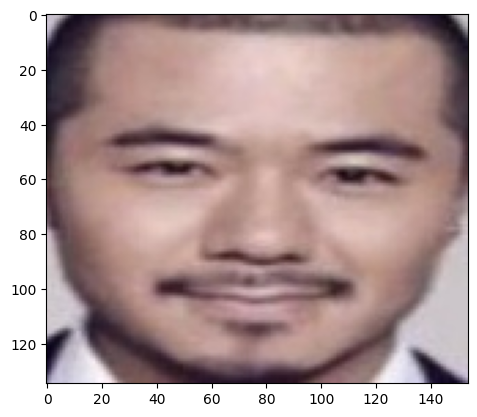

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.9483644  0.08320573]]
This person is not wearing a mask.


Enter image path !!:  /kaggle/input/face-mask-dataset/data/without_mask/without_mask_1003.jpg


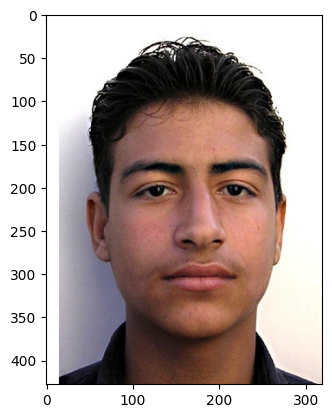

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.94773287 0.08406842]]
This person is not wearing a mask.


In [68]:
from keras.models import load_model
model=load_model("/kaggle/working/face_mask__.keras")

verifications_no=int(input("enter number of image you want to Verify it: "))
if verifications_no>0:
    for i in range(verifications_no):
        new_image=input("Enter image path !!: ")

        img=mimg.imread(new_image)
        plt.imshow(img)
        plt.show()
        img=cv2.resize(img,(128,128))
        img=img/255
        img=np.reshape(img,[1,128,128,3])
        pred=model.predict(img)
        print(pred)

        output=np.argmax(pred)
        if output==0:
                print("This person is not wearing a mask.")
        else:
            print("This person is wearing a mask.")


enter number of image you want to Verify it:  5
Enter image path !!:  /kaggle/input/face-mask-dataset/data/with_mask/with_mask_1.jpg


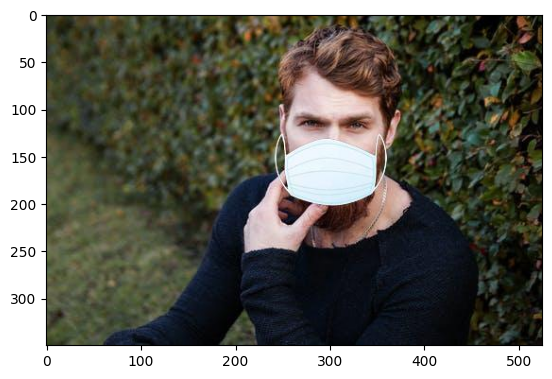

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
[[0.06001357 0.9715579 ]]
This person is wearing a mask.


Enter image path !!:  /kaggle/input/face-mask-dataset/data/with_mask/with_mask_1004.jpg


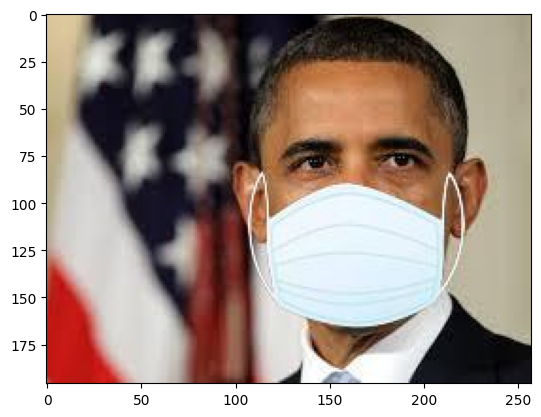

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.06857336 0.9657124 ]]
This person is wearing a mask.


Enter image path !!:  /kaggle/input/face-mask-dataset/data/with_mask/with_mask_101.jpg


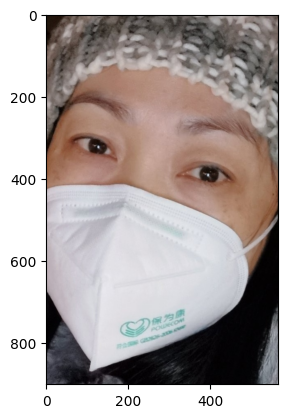

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.4380713  0.59229827]]
This person is wearing a mask.


Enter image path !!:  /kaggle/input/face-mask-dataset/data/with_mask/with_mask_1015.jpg


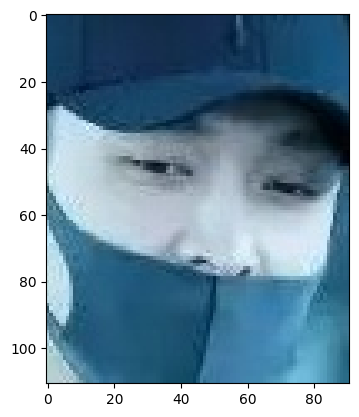

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.6770314  0.37348226]]
This person is not wearing a mask.


Enter image path !!:  /kaggle/input/face-mask-dataset/data/with_mask/with_mask_102.jpg


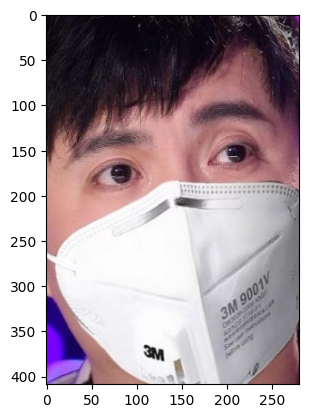

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.3178437 0.7199345]]
This person is wearing a mask.


In [69]:
from keras.models import load_model
model=load_model("/kaggle/working/face_mask__.keras")

verifications_no=int(input("enter number of image you want to Verify it: "))
if verifications_no>0:
    for i in range(verifications_no):
        new_image=input("Enter image path !!: ")

        img=mimg.imread(new_image)
        plt.imshow(img)
        plt.show()
        img=cv2.resize(img,(128,128))
        img=img/255
        img=np.reshape(img,[1,128,128,3])
        pred=model.predict(img)
        print(pred)

        output=np.argmax(pred)
        if output==0:
                print("This person is not wearing a mask.")
        else:
            print("This person is wearing a mask.")


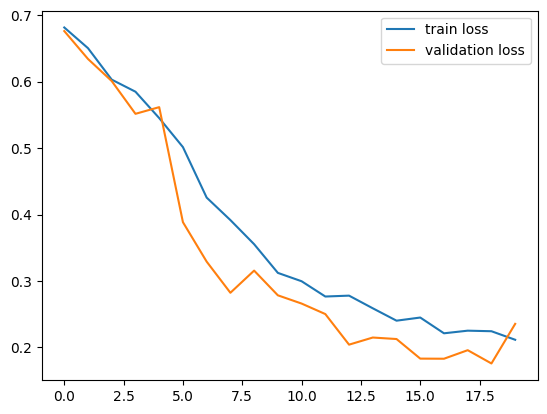

In [60]:
history = History

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

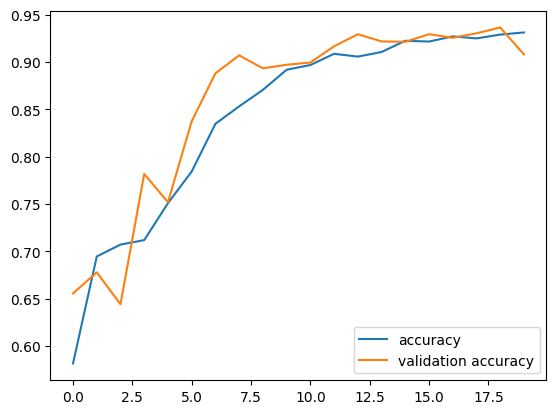

In [62]:
plt.plot(History.history['accuracy'], label='accuracy')
plt.plot(History.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()